In [2]:
path="/content/drive/MyDrive/Videos for Themed music video/archive.zip"
target="/content/drive/MyDrive/intern_data/Train"
test="/content/drive/MyDrive/intern_data/Test/"

In [51]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
from skimage.io import imread

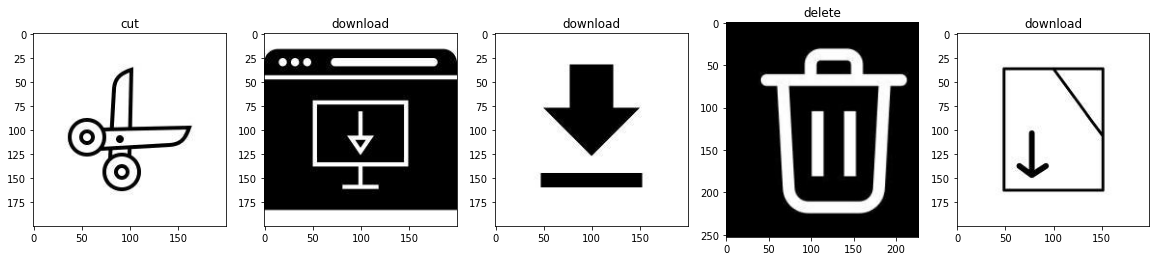

In [3]:
plt.figure(figsize=(20,20))
for i in range(5):
    file = random.choice(os.listdir(target))
    image_path= os.path.join(target, file)
    img_files = random.choice(os.listdir(image_path))
    img=mpimg.imread(os.path.join(image_path, img_files))
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [4]:
img_width=256
img_height=256

In [6]:

def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            #print("file",file)
            image_path= os.path.join(img_folder, dir1,  file)
            #print("image_path",image_path)
            image= imread( image_path)#, cv2.COLOR_BGR2RGB)
            #if(isempty(image))
            image=cv2.resize(image,(img_height, img_width),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255
            img_data_array.append(image)
            class_name.append(dir1)
    img=np.array(img_data_array)
    msk=np.array(class_name)
    return img_data_array, class_name
img_data, class_name =create_dataset(target)


In [ ]:
np.save("/content/drive/MyDrive/intern_data/train",img_data)
np.save("/content/drive/MyDrive/intern_data/labels",class_name)
print("Dataset Created")

In [1]:
train1="/content/drive/MyDrive/intern_data/train.npy"
mask1="/content/drive/MyDrive/intern_data/labels.npy"

In [4]:
x_train = np.load(train1)
y_train =np.load(mask1)

In [5]:
print(x_train.shape)
print(y_train.shape)

(3740, 256, 256, 3)
(3740,)


In [11]:
print(y_train)

['cut' 'cut' 'cut' ... 'download' 'download' 'download']


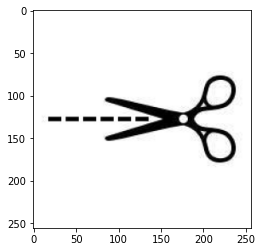

In [9]:
plt.imshow(x_train[0])

In [12]:
target_dict={k: v for v, k in enumerate(np.unique(y_train))}
target_dict

{'cut': 0, 'delete': 1, 'download': 2}

In [13]:
target_val=  [target_dict[y_train[i]] for i in range(len(y_train))]

In [14]:
print(target_val)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [16]:
num_classes = 3

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train,np.array(target_val), batch_size=10, epochs=5, verbose=1)

Epoch 1/5
374/374 [==============================] - 38s 13ms/step - loss: 1.0155 - accuracy: 0.6691
Epoch 2/5
374/374 [==============================] - 5s 13ms/step - loss: 0.2903 - accuracy: 0.8891
Epoch 3/5
374/374 [==============================] - 5s 13ms/step - loss: 0.0935 - accuracy: 0.9742
Epoch 4/5
374/374 [==============================] - 5s 13ms/step - loss: 0.0469 - accuracy: 0.9874
Epoch 5/5
374/374 [==============================] - 5s 13ms/step - loss: 0.0256 - accuracy: 0.9904


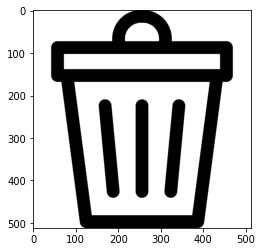

In [54]:
 test="/content/drive/MyDrive/intern_data/Test/"
ls=os.listdir(test)
image= imread(test+ls[0])#, cv2.COLOR_BGR2RGB)
plt.imshow(image)
image=cv2.resize(image, (256, 256),interpolation = cv2.INTER_AREA)
image=np.array(image)
image = image.astype('float32')
image /= 255 
#plt.imshow(image*255)
image=np.expand_dims(image,axis=0)

In [22]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [23]:
pred=probability_model.predict(image)
print(pred)

[[0.0067422  0.7003848  0.29287305]]


In [24]:
k=np.argmax(pred)
k

1

In [25]:
for i,j in target_dict.items():
  if(j==k):
    print(i)

delete
